# Computational Model of Parkinson's Disease

## Introduction

Parkinson's Disease (PD) is a widespread age-related neurodegenerative disorder, which involves several neural pathways of motors and non-motors. The main symptoms of PD, rigidity, slowness of movement, and tremor, appear mostly at older age and get worse with increasing age. The core pathology underlying PD is degeneration of dopaminergic neurons in the substantia nigra pars compacta (SNc) in midbrain, leading to the decrease in the dopamine (DA) level in striatum. This in turn makes the thalamic neurons inhibited. Without the thalamic input, the motor cortex neurons are not as excited, and therefore the motor system is less able to execute the motor plans in response to the patient’s volition.

Importantly, parkinsonism leads to various electrophysiological changes in the basal ganglia-thalamo cortical system (BGTCS). The main structures comprising this system are the striatum, the substantia nigra, the globus pallidus internal (GPi) and external (GPe) segments, and the subthalamic nucleus (STN). 

This work focuses on mean-field computational model of the BGTCS, introduced by van Albada and Robinson in 2009 [1](https://arxiv.org/pdf/1801.01822.pdf). 

### In this course work we **aim** to:
1. Reproduce the model and its two main states: dopamine depleted (DD) and healthy (noDD);

2. Introduce the age term into the model. Explore how the system dynamics unfold with aging;

3. Explore how different hypothesis of PD change the dynamics of the system. 



## Results

### BGTCS Model

 This model captured the direct, indirect, and hyperdirect pathways, 5 types of progressive dopamine loss, and sought to identify differences between healthy and PD states [1, 2]. Their study is also an early example of using functional connectivity to distinguish the healthy and diseased states and map the model to known anatomical regions. The work exemplifies a balance of the qualities of 1) exemplary knowledge of PD and literature review for hypotheses to test and calibrations, 2) sophisticated numerical methods, and 3) a rich set of phenomena captured at the appropriate systems level, in this case using mean field theory for efficient simplification of a complicated system. Most modeling studies are under-weighted in one or two of those categories.

The model consists of 9 second order differential equations: 1 of firing rate of cortex and 8 of mean firing rate of all populations:

$$\dot{\phi}_e^{i+1}=\gamma_e^2 \cdot\left(S\left[V_e^i, Q_e, \theta_e\right]-\phi_e^i\right)-2 \cdot \gamma_e \cdot \dot{\phi}_e^i$$

$$\dot{V}_e^{i+1}=\alpha \gamma_e \cdot\left(v_{e e} \phi_e+v_{e i} S\left[V_i^i, Q_i, \theta_i\right]+v_{e s} S\left[V_s^{\left(i-\tau_{e s}\right)}, Q_s, \theta_s\right]-V_e^i\right)-a P b \cdot \dot{V}_e^i$$

$$\dot{V}_i^{i+1}=\alpha \gamma_e \cdot\left(v_{i i} S\left[V_i^i, Q_i, \theta_i\right]+v_{i e} \phi_e^i+v_{i s} S\left[V_s^{\left(i-\tau_{i s}\right)}, Q_s, \theta_s\right]-V_i^i\right)-a P b \cdot \dot{V}_i^i$$

and the same equations for $V_{D 1}, V_{D 2}, V_{p 1}, V_{p 2}, V_{S T N}, V_r, V_s$


In [1]:
# Import class and visualisation functions
import matplotlib.pyplot as plt
import numpy as np

from mfm_model import MFM
from mfm_model import plot_beta_envelope, plot_psd
from mfm_model import plot_activity, plot_limit_cycles
from mfm_model import print_var, plot_slidingw_var, plot_accum_var

In [2]:
# healthy state generate and plot avtivity for all populations
kwargs = {'DD': False,
            'noise': True,
            'cDBS': False,
            'pDBS': False,
            'fname': 'data/healthy_test.mfm'}

mfm = MFM(**kwargs) 
mfm.run()
mfm.save()

 0:00:11 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000


In [3]:
# defauls PD state generate and plot activity
kwargs = {'DD': True,
            'noise': True,
            'cDBS': False,
            'pDBS': False,
            'fname': 'data/pd_test.mfm'}

mfm = MFM(**kwargs) 
mfm.run()
mfm.save()

 0:00:10 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000


### Introduce Age term into the system


Dopamine depletion can be modeled by decreasing the firing thresholds of striatal neurons as well as corticostriatal connection strengths to both D1 and D2 neurons [[1](https://arxiv.org/pdf/1801.01822.pdf), [2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6673853/pdf/zns3567.pdf)]

```{figure} figs/ageform.png
```


By gradually increasing ***h*** and $\chi$ parameters, we modeled the progressive dopamine depletion that occurs in PD with age. The following values were used:


h, xi

10 0.05   (~60 yo)

15 0.6    (~70 yo)

24 0.6    (~80 yo)

#### Power Spectral Density (PSD) in three areas of basal ganglia

```{figure} figs/agePSD.png
```


#### Amplitude of peak in beta band   

```{figure} figs/agePSD2.png
```

### Check different hypotheses of PD formation

We implemented all 5 hypothesis introduced in the paper:

**#1**: reducing  both firing thresholds and corticostriatal connection strengths to D1 and D2 neurons in striatum

**#2**: increasing νd2e and decreasing νd1e (direct/indirect pathway model)

**#3**: reducing lateral inhibition in the GPe, which mimicks enhanced levels of enkephalin;

**#4**: reducing cortical interactions to capture loss of intrinsic cortical dopamine;

**#5**: combination of 2, 3, 4

We also combined #1 and #5 together to model more severe PD: 

**#15**: combine 1 and 5


In [4]:
# First we generate activity for all hypothesis
hyp_list = [1, 2, 3, 4, 5, 15]
for h in hyp_list:
    # defauls PD state generate and plot activity
    kwargs = {'DD': True,
                'noise': True,
                'cDBS': False,
                'pDBS': False,
                'DDmode': h,
                'fname': 'data/hyp_test_{}.mfm'.format(h)}

    mfm = MFM(**kwargs) 
    mfm.run()
    mfm.save()

 0:00:10 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000
 0:00:10 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000
 0:00:10 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000
 0:00:09 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000
 0:00:10 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000
 0:00:10 [==================== 100.00 % ====================] 0:00:00 

Saving data...
  RunID: 000


Now we can compare how the activity changes with the change of different parameters (according to hypothesis).

In [9]:
list_files = ['data/hyp_test_1.mfm', 
              'data/hyp_test_2.mfm',
              'data/hyp_test_3.mfm',
              'data/hyp_test_4.mfm',
              'data/hyp_test_5.mfm',
              'data/hyp_test_15.mfm']
list_names = ['1', '2', '3', '4', '5', '15']

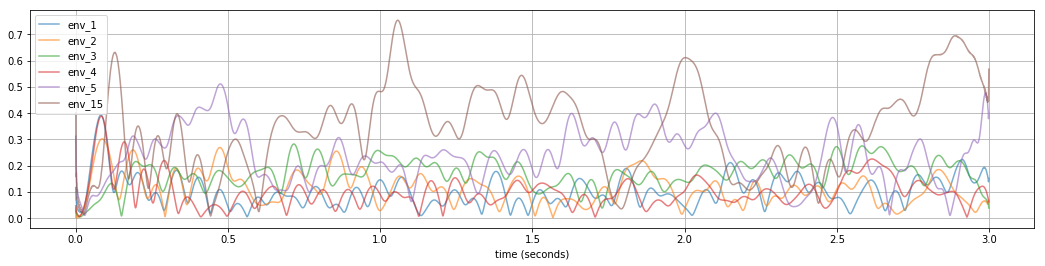

In [10]:
plot_beta_envelope(list_files, list_names, 1000, 4000)

The higher the envelope and the longer its "wave", the worse is PD - we can see that **15** mode and **5** mode has the higest envelopes

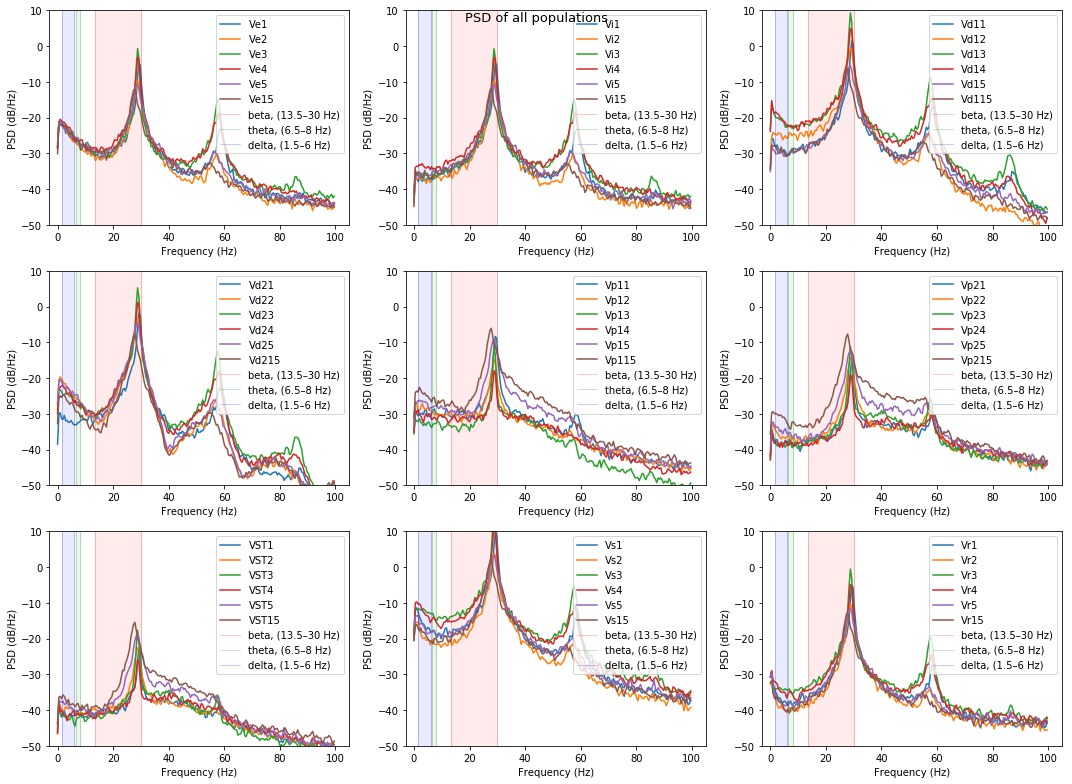

{}

In [11]:
plot_psd(list_files, list_names, beta_peak=False)

As it is seen in real PD patients the STN, GPe(p2) and GPi(p1) areas have more powerfull beta band, with high peak in PD

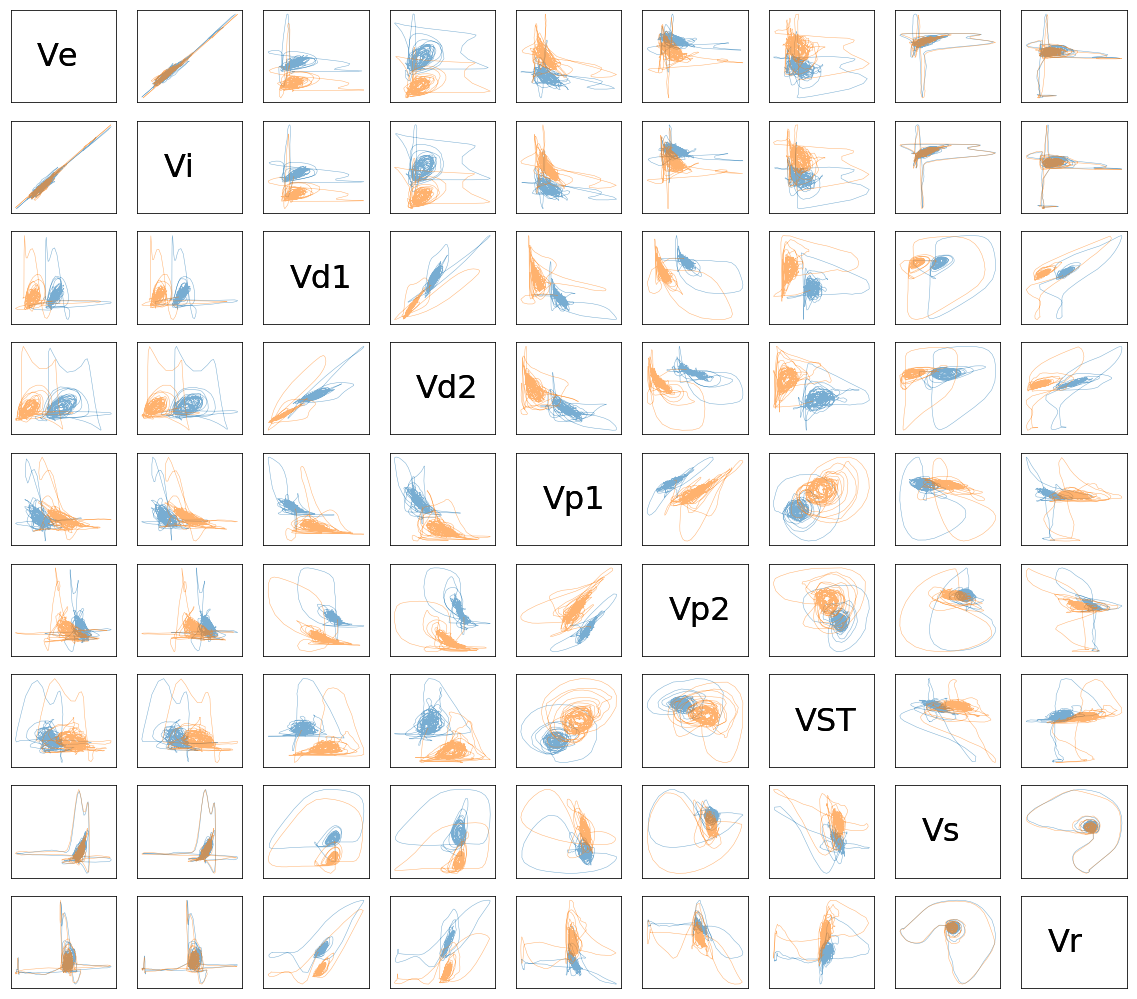

In [12]:
plot_limit_cycles(list_files[-2:], list_names[-2:], 0, 1000)

## Discussion

The BGTCS model successfully catches the main PD hallmarks: the increase of oscillation in the beta range (at 29 Hz), the alteration of firing rate (activity) (an increase in STN and a decrease in GPe), an increase of the variance of the activity in STN and GPe, and an increase of amplitude and duration of beta-envelope.

Second, we have tested the model parameters corresponding to the 5 hypotheses of PD, suggested by van Albada and Robinson [1](https://arxiv.org/pdf/1801.01822.pdf). By testing different parameters under hypothesis #1, we modeled progressive dopamine depletion to illustrate PD progression with age. As expected, amplitude and duration of beta peak (29 Hz) increased in PD state with age in STN, p1 and p2 areas.

We also compared the results, i.e. reproducing PD hallmarks, of the 5 hypotheses, as well as the combination of hypotheses 1 and 5. Under hypotheses 2, 3, and 4, the system dynamics did not change too much in PD state, as compared to the healthy state. On the contrary, hypotheses 5 and 15 were able to model severe PD dynamic changes.



## Credits

Kuzmina Ekaterina - validating #2, 3, 4, 5 hypothesis of aging

Molodova Maria - validating #1 hypothesis and how parameters in this hypothesis affect PD severity

## References

[1] Van Albada SJ, Robinson PA. Mean-field modeling of the basal ganglia-thalamocortical sys tem. I. Firing rates in healthy and parkinsonian states (2009) J Theor Biol 257: 642–663, DOI: 10.1016/j.jtbi.2008.12.018

[2] Leblois A, Boraud T, Meissner W, Bergman H, Hansel D. Competition between feedback loops underlies normal and pathological dynamics in the basal ganglia. J Neurosci. 2006 Mar 29;26(13):3567-83. doi: 10.1523/JNEUROSCI.5050-05.2006. PMID: 16571765; PMCID: PMC6673853.